In [1]:
# Importing necessary libraries
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
import zipfile
# Path to the uploaded zip file
zip_file_path = '/content/audio.zip'

# Unzipping the file and listing the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract to a temporary directory
    extract_path = '/content/audio_extracted'
    zip_ref.extractall(extract_path)

# Listing the files and directories extracted
extracted_files = os.listdir(extract_path)
extracted_files.sort()
extracted_files

['__MACOSX', 'audio']

In [4]:
# Path to the audio directory inside the extracted folder
audio_dir_path = os.path.join(extract_path, 'audio')

# Listing the files and directories inside the audio directory
audio_files = os.listdir(audio_dir_path)
audio_files.sort()
audio_files

['0.mp3',
 '1.mp3',
 '10.mp3',
 '11.mp3',
 '12.mp3',
 '13.mp3',
 '14.mp3',
 '15.mp3',
 '16.mp3',
 '17.mp3',
 '18.mp3',
 '19.mp3',
 '2.mp3',
 '3.mp3',
 '4.mp3',
 '5.mp3',
 '6.mp3',
 '7.mp3',
 '8.mp3',
 '9.mp3']

File: 0.mp3
Sample Rate: 44100 Hz
Duration: 3.87 seconds


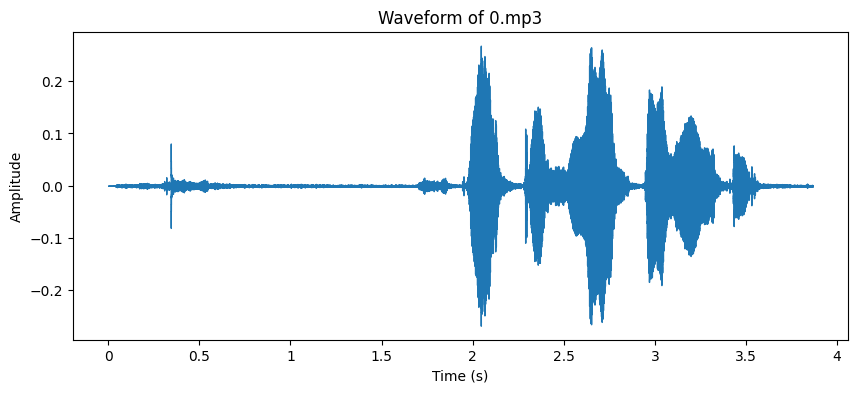

File: 1.mp3
Sample Rate: 44100 Hz
Duration: 3.06 seconds


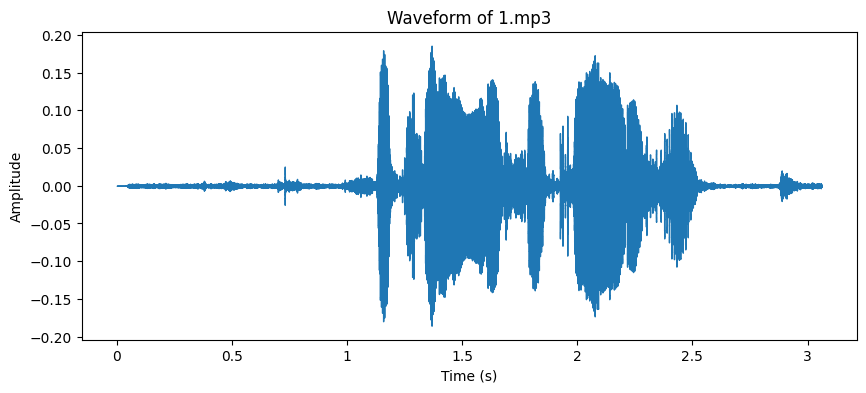

File: 10.mp3
Sample Rate: 44100 Hz
Duration: 3.38 seconds


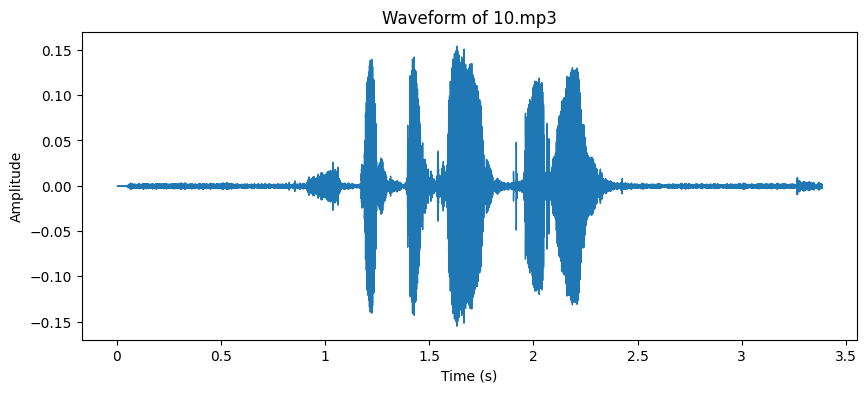

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to load and display basic information of an audio file
def load_and_display_audio_info(file_path):
    # Loading the audio file
    audio, sample_rate = librosa.load(file_path, sr=None)  # Load with original sample rate
    duration = librosa.get_duration(y=audio, sr=sample_rate)

    # Displaying basic information
    print(f"File: {os.path.basename(file_path)}")
    print(f"Sample Rate: {sample_rate} Hz")
    print(f"Duration: {duration:.2f} seconds")

    # Plotting the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f"Waveform of {os.path.basename(file_path)}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Loading and displaying information for the first three audio files
for file in audio_files[:3]:
    file_path = os.path.join(audio_dir_path, file)
    load_and_display_audio_info(file_path)


In [7]:
# Example function to extract features from an audio file
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs_scaled = np.mean(mfccs.T, axis=0)  # Scaling the MFCCs

    # Other feature extractions can be added here

    return mfccs_scaled

# Extracting features for each audio file
features = []
for file in audio_files:
    file_path = os.path.join(audio_dir_path, file)
    features.append(extract_features(file_path))

In [8]:
# Converting to a DataFrame for further analysis
features_df = pd.DataFrame(features)

# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

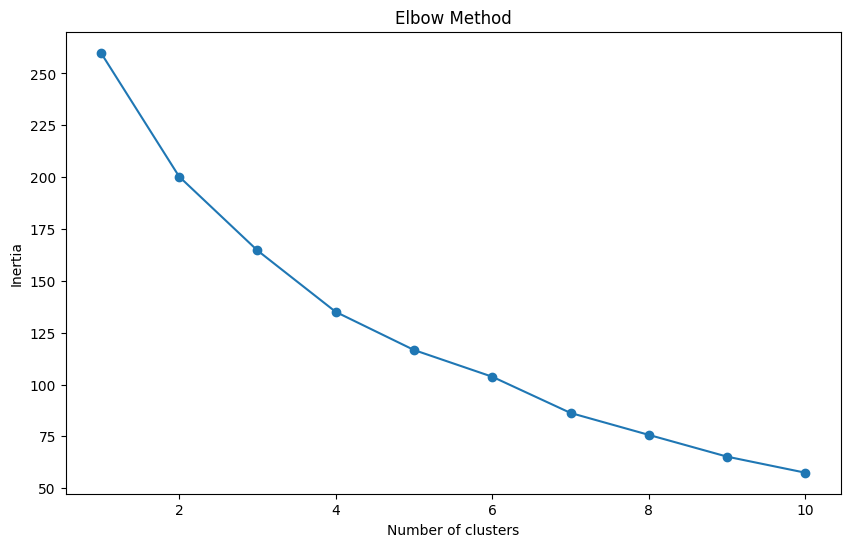

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with the chosen number of clusters
optimal_clusters = 3  # This value can be decided based on the Elbow Graph
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_features)


Silhouette Score: 0.16990384459495544


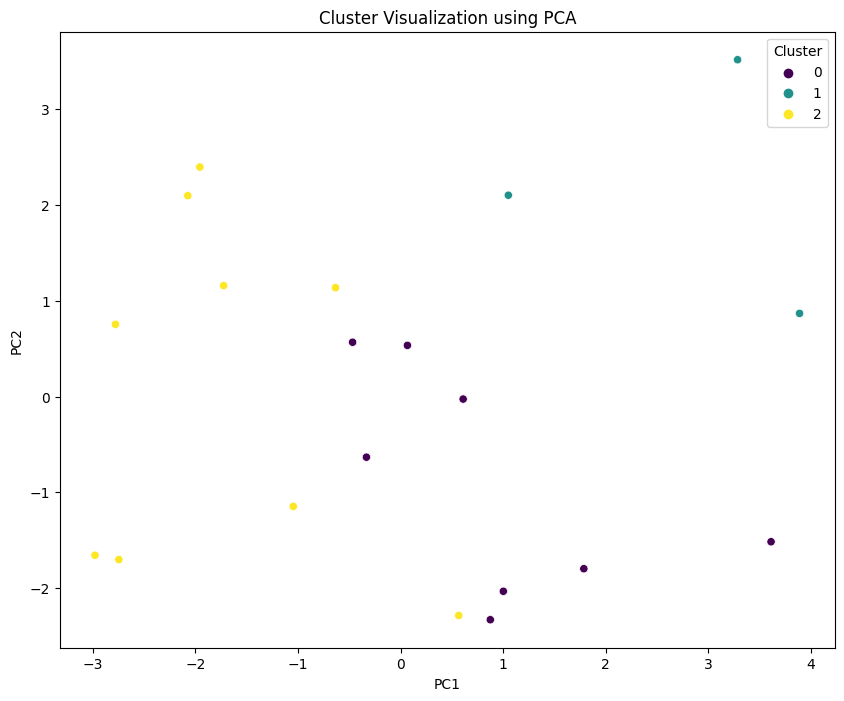

In [11]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# Calculating Silhouette Score
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Visualizing the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame for visualization
clustered_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
clustered_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=clustered_df, palette='viridis', legend='full')
plt.title('Cluster Visualization using PCA')
plt.show()

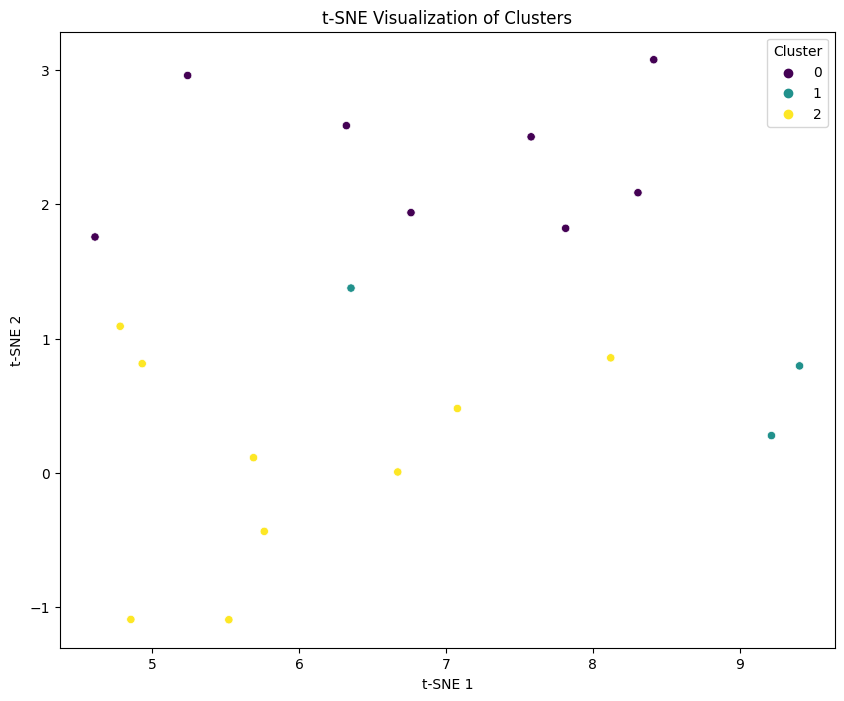

In [15]:
from sklearn.manifold import TSNE

perplexity_value = min(30, 11)

# t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity_value)
tsne_results = tsne.fit_transform(scaled_features)

# Visualizing the Clusters
tsne_df = pd.DataFrame(data = tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = clusters

plt.figure(figsize=(10,8))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Clusters')
plt.show()


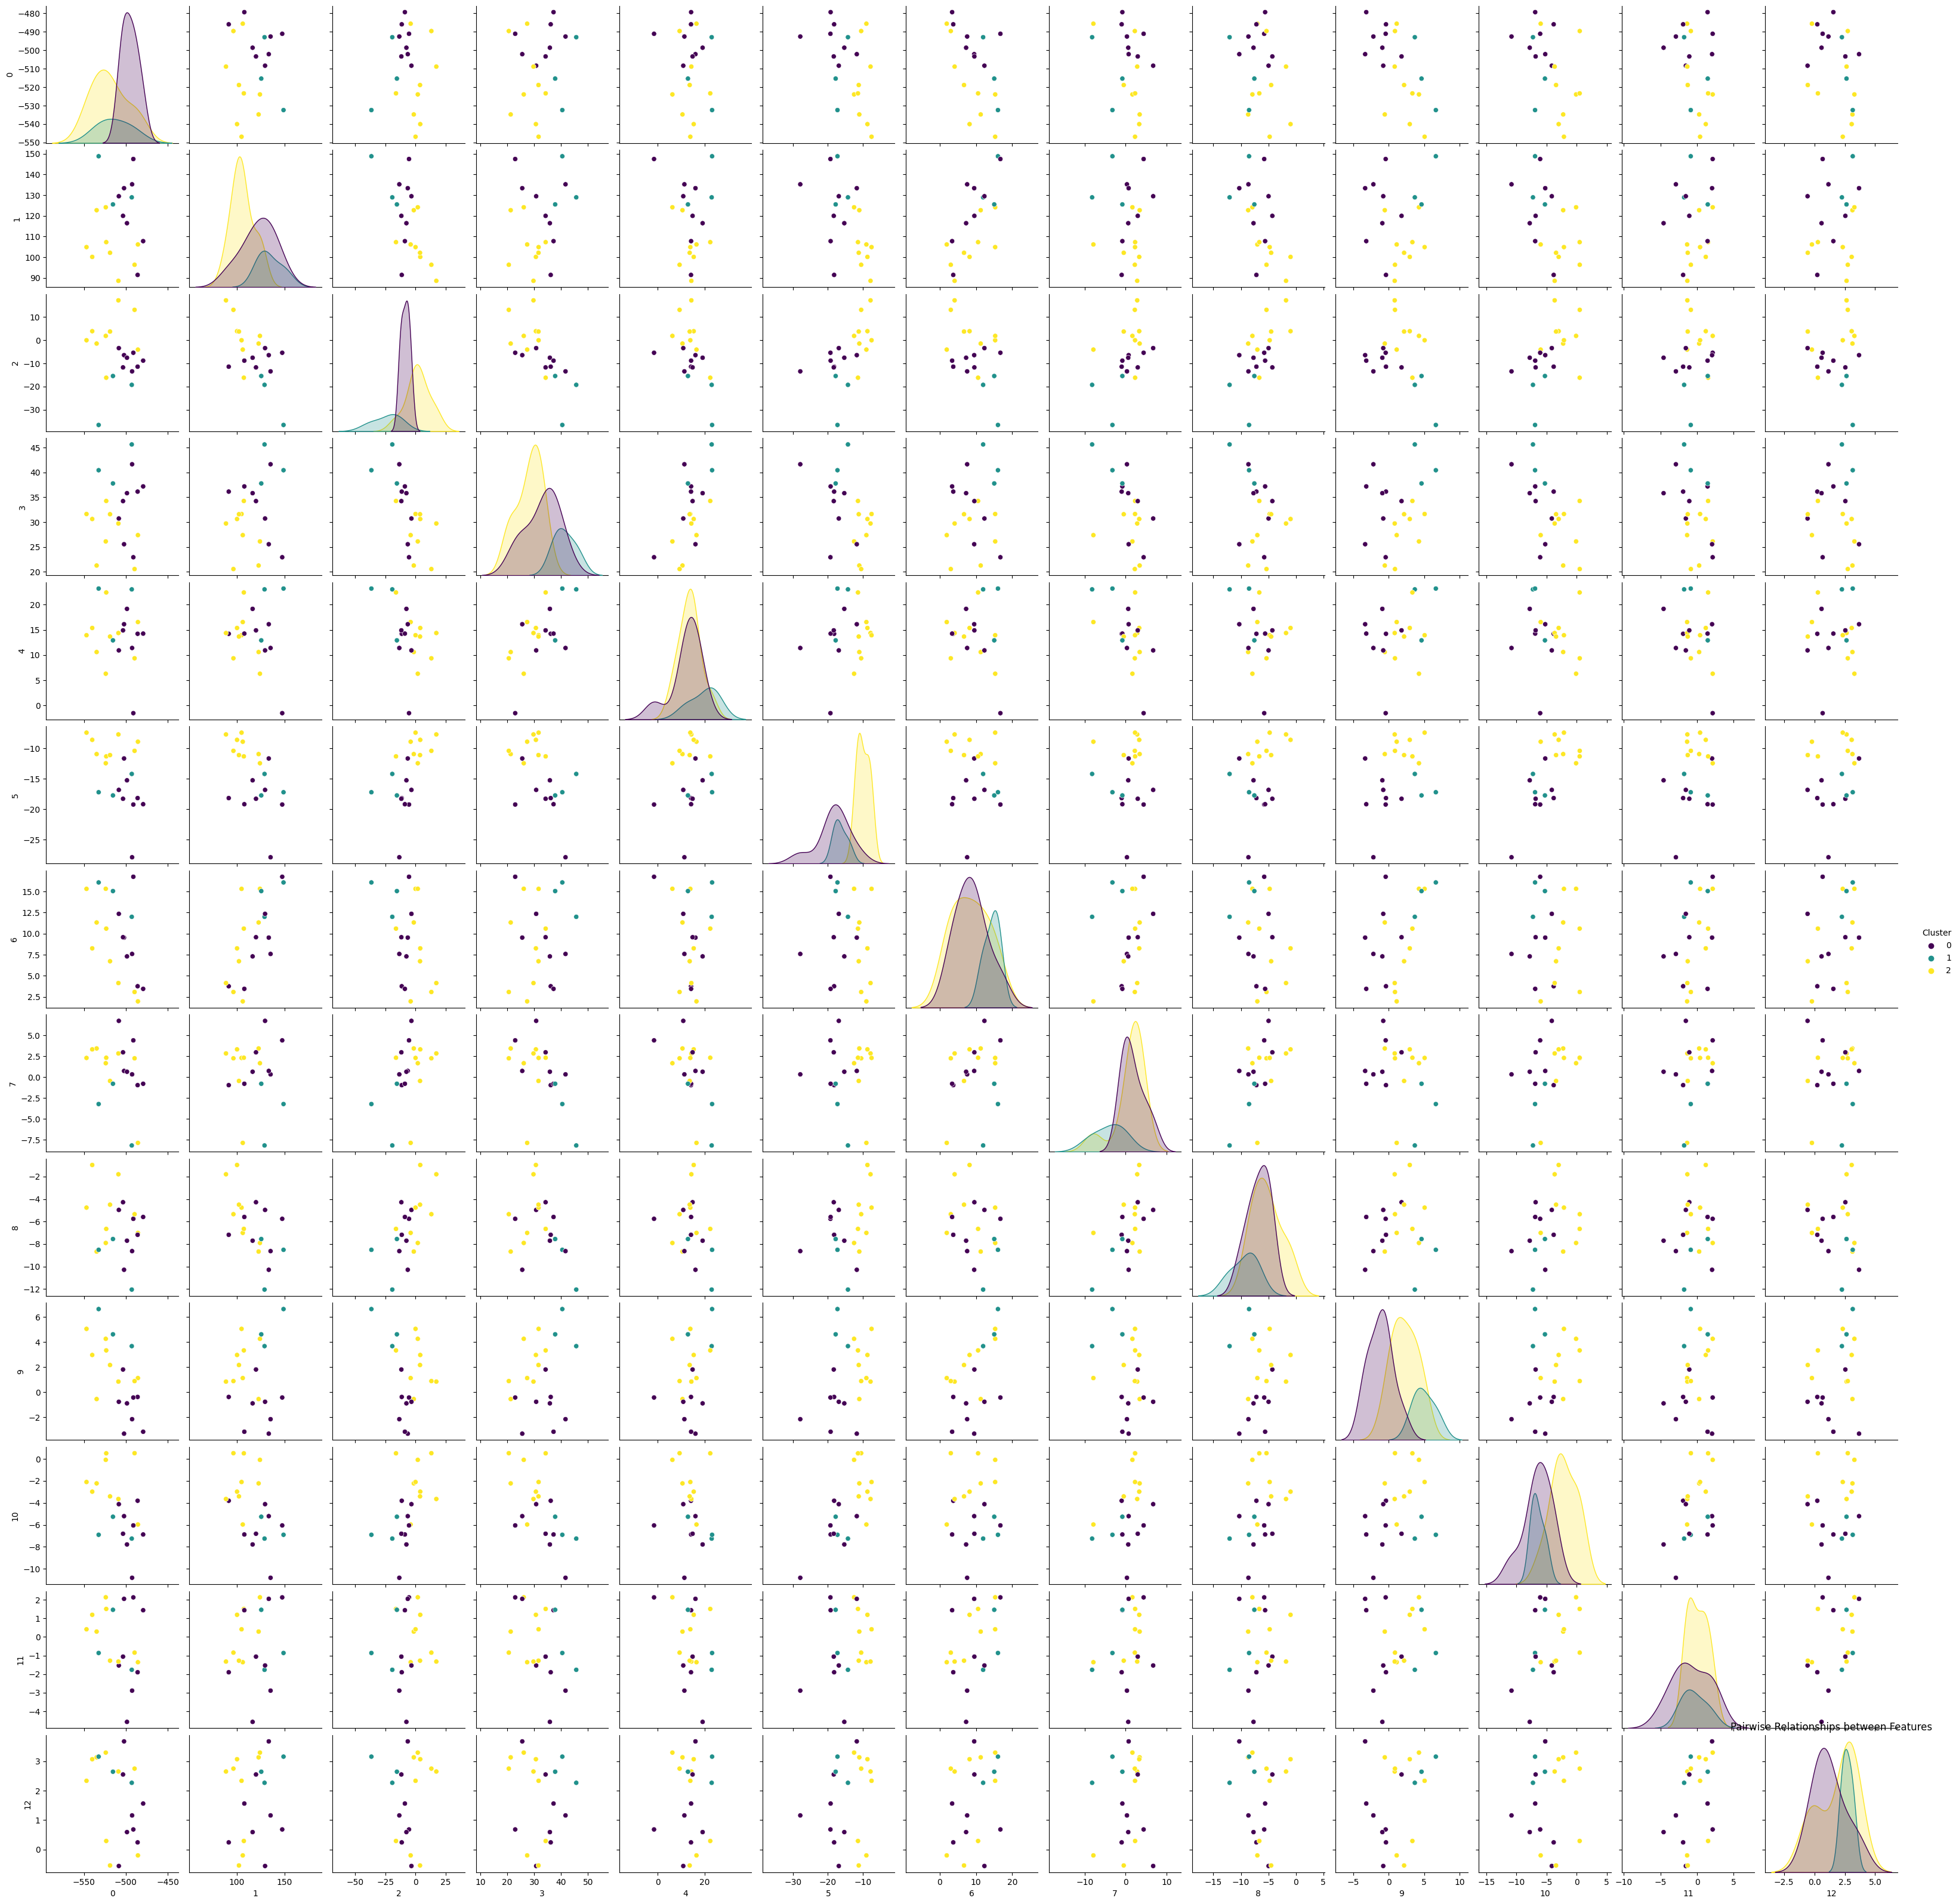

In [16]:
# Creating a DataFrame with clusters
pair_df = features_df.copy()
pair_df['Cluster'] = clusters

# Plotting Pair Plot
sns.pairplot(pair_df, hue='Cluster', palette='viridis')
plt.title('Pairwise Relationships between Features')
plt.show()


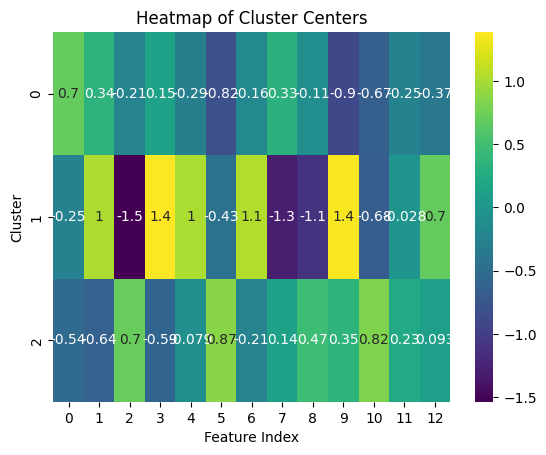

In [17]:
# Getting cluster centers
cluster_centers = kmeans.cluster_centers_

# Heatmap of Cluster Centers
sns.heatmap(cluster_centers, annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Centers')
plt.xlabel('Feature Index')
plt.ylabel('Cluster')
plt.show()

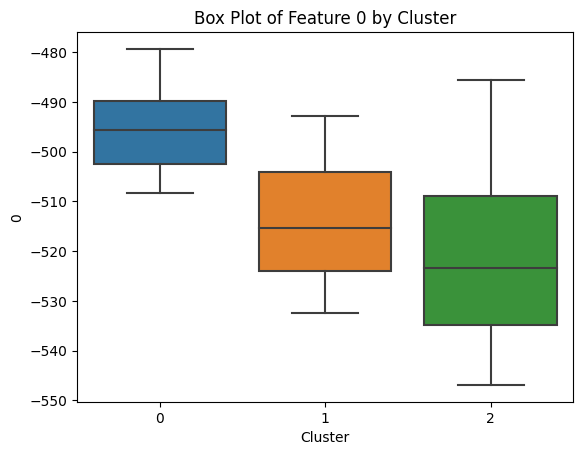

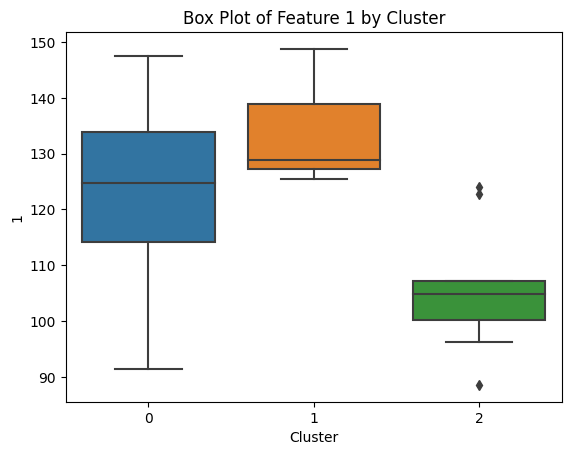

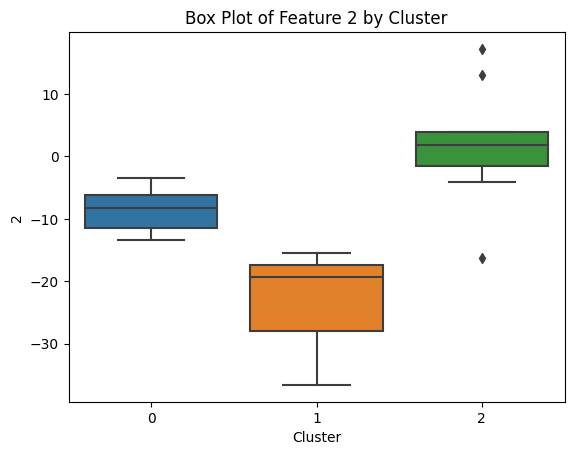

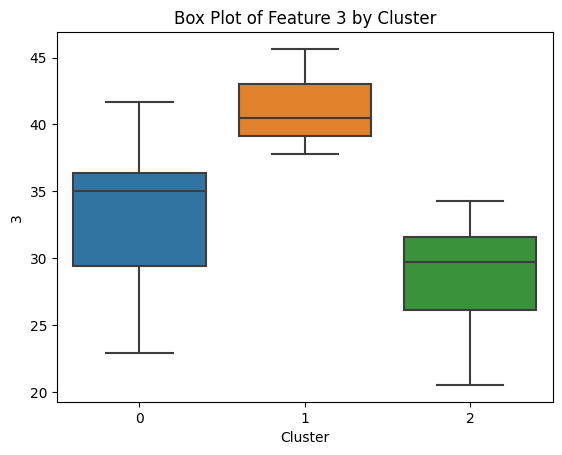

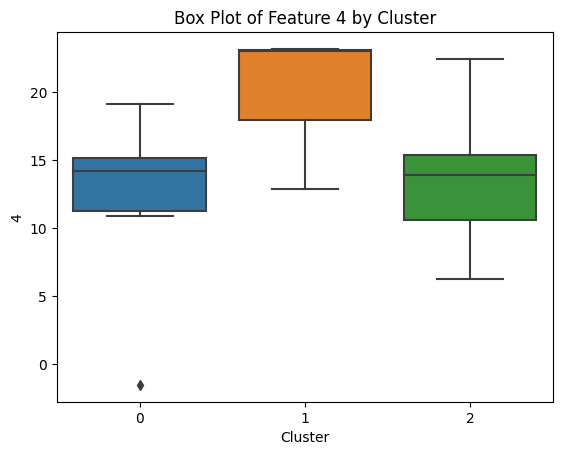

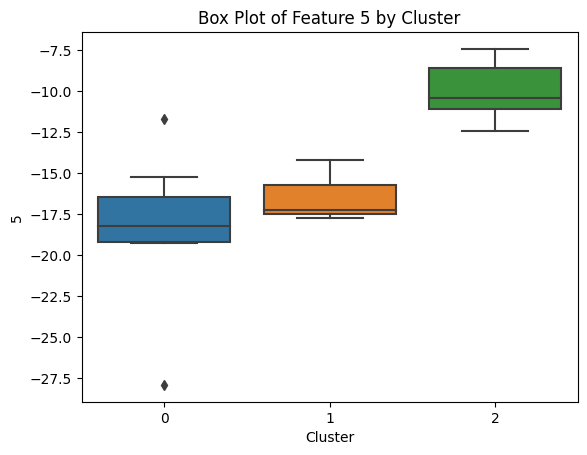

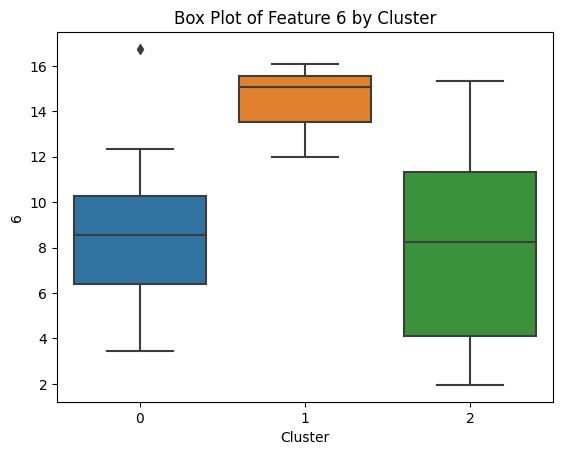

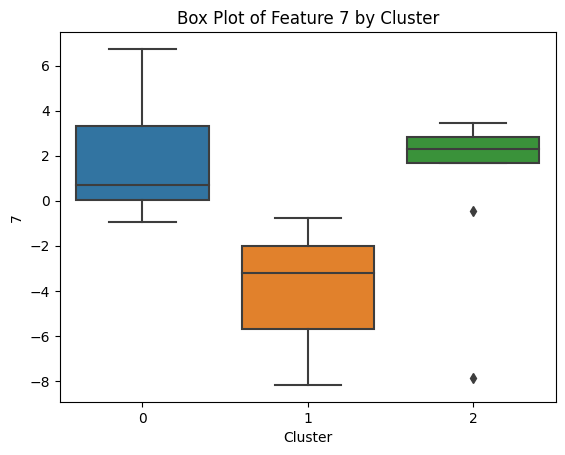

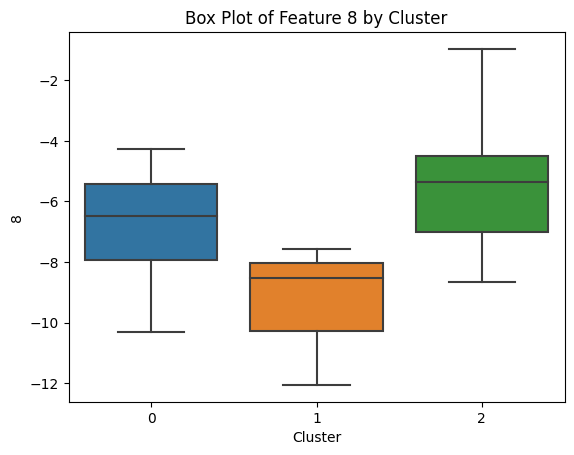

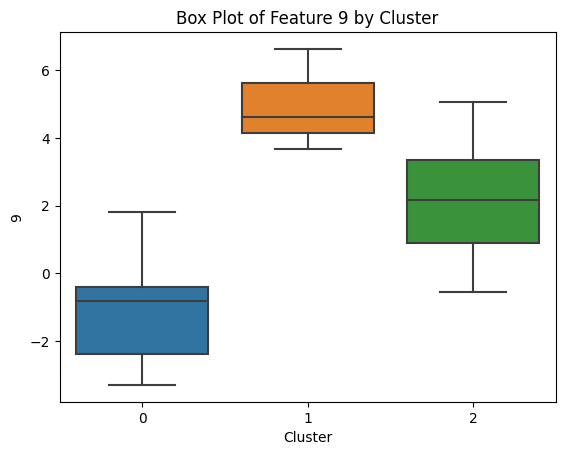

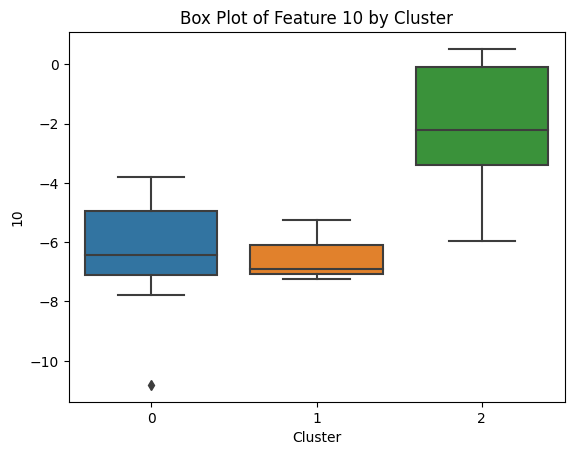

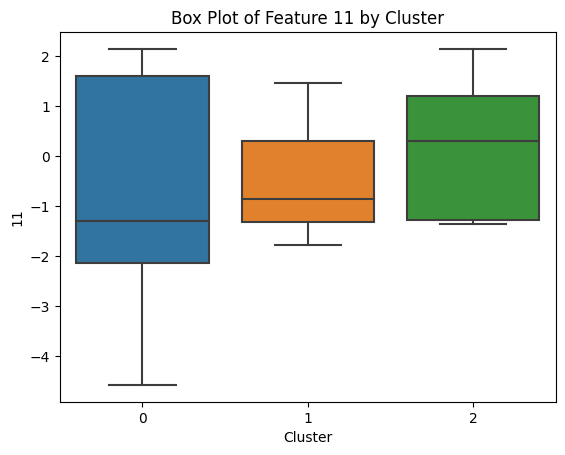

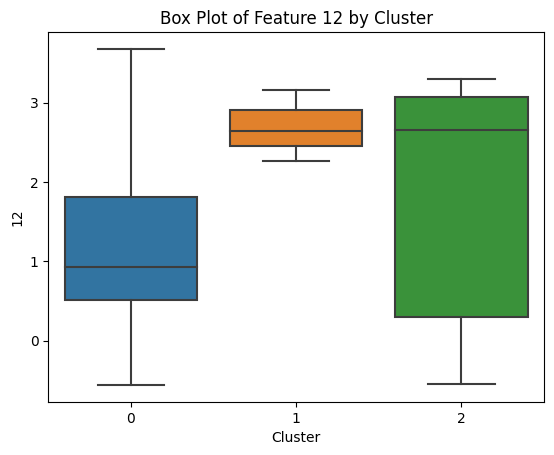

In [18]:
# Box Plot for each cluster and feature
for i in range(scaled_features.shape[1]):
    sns.boxplot(x='Cluster', y=i, data=pair_df)
    plt.title(f'Box Plot of Feature {i} by Cluster')
    plt.show()